In [18]:
import numpy as np
import matplotlib.pylab as mpl
from matplotlib import pyplot as plt
%matplotlib inline

In [19]:
def rho_green_light(nx, rho_light):
    rho = np.arange(nx) * 2 / nx * rho_light
    rho[int((nx - 1) / 2):] = 0
    return rho

In [29]:
nx = 81
nt = 30
dx = 4.0 / (nx - 1)
x = np.linspace(0., 4., nx)
rho_max = 10
u_max = 1
rho_light = 5
rho = rho_green_light(nx, rho_light)

#plt.plot(x, rho)

In [21]:
def compute(u_max, rho_max, rho):
    return u_max * rho * (1 - rho / rho_max)

In [22]:
def ftbs(rho, nt, dt, dx, rho_max, u_max):
    rho_n = np.zeros((nt, len(rho)))
    rho_n[0, :] = rho.copy()
    
    for t in range(1, nt):
        F = compute(u_max, rho_max, rho)
        rho_n[t, 1:] = rho[1:] - dt / dx * (F[1:] - F[:-1])
        rho_n[t, 0] = rho[0]
        rho = rho_n[t].copy()
        
    return rho_n

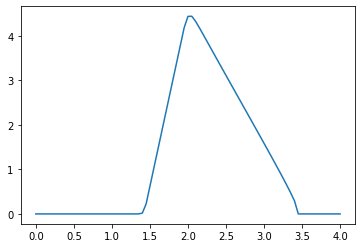

In [30]:
sigma = 1
dt = sigma * dx
rho_n = ftbs(rho, nt, dt, dx, rho_max, u_max)

plt.plot(x, rho_n[-1, :])